## Exposure  Analysis
for each ct $j$ in Illinois, the exposure vector $v^{(j)}$, whose entry $v_i^{(j)}$ encodes the contribution of ct in Illinois to the importation risk $R_j$:

$$v_i^{(j)} = \frac{r_{i,j}}{R_j}$$

By construction these entries sum to one, $\Sigma_i v_i^{(j)} = 1$. Therefore, we can use entropy related metrics to quantify the similarity between the exposure patterns of two different
destination cts($j$),$\alpha$ and $\beta$. Specifically, once defined the **entropy** of $v^{(\alpha)}$ as 

$$ S(v^{(\alpha)}) = -\Sigma_i v^{(\alpha)} log v^{(\alpha)}$$,

we used the **Jensen-Shannon divergence** between the two vectors, $v^{(\alpha)}$ and $v^{(\beta)}$,defined as

$$\Delta_{\alpha\beta} = S(\frac{v^{(\alpha)}+v^{(\beta)}}{2}) = \frac{S(v^{(\alpha)})+S(v^{(\beta)})}{2}$$

We then apply **agglomerative clustering (linkage complete)** to identify clusters of countries with similar exposure patterns


### Data Preperation

In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

In [2]:
risk_flow_df1 = pd.read_csv("risk_flow_matrix1.csv").set_index("GEOID")
# df -> matrix(2d array)
risk_flow_matrix1 = risk_flow_df1.values
risk_flow_matrix1

array([[5.11190675e-07, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.93004947e-07, 3.14403958e-06, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.98752103e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [185]:
# set all 0s in matrix to a extremly small value
risk_flow_matrix1[risk_flow_matrix1 == 0] = 10**-10

# for each element in the risk flow matrix, devided by its row sum
# -> exposure matrix
v_matrix1 = risk_flow_matrix1
# v_matrix1 = risk_flow_matrix1/risk_flow_matrix1.sum(axis = 1, keepdims = True)
v_matrix1

array([[5.11190675e-07, 1.00000000e-10, 1.00000000e-10, ...,
        1.00000000e-10, 1.00000000e-10, 1.00000000e-10],
       [3.93004947e-07, 3.14403958e-06, 1.00000000e-10, ...,
        1.00000000e-10, 1.00000000e-10, 1.00000000e-10],
       [1.00000000e-10, 1.00000000e-10, 1.98752103e-05, ...,
        1.00000000e-10, 1.00000000e-10, 1.00000000e-10],
       ...,
       [1.00000000e-10, 1.00000000e-10, 1.00000000e-10, ...,
        1.00000000e-10, 1.00000000e-10, 1.00000000e-10],
       [1.00000000e-10, 1.00000000e-10, 1.00000000e-10, ...,
        1.00000000e-10, 1.00000000e-10, 1.00000000e-10],
       [1.00000000e-10, 1.00000000e-10, 1.00000000e-10, ...,
        1.00000000e-10, 1.00000000e-10, 1.00000000e-10]])

In [186]:
# v_matrix * np.log(v_matrix)

In [187]:
# log_v_matrix = np.log(exposure_v_matrix)
# log_v_matrix[np.isinf(log_v_matrix)] = -10
# log_v_matrix

In [188]:
log_v_matrix1 = np.log(v_matrix1)
S1 = (-v_matrix1 * log_v_matrix1).sum(axis = 1, keepdims = True)
S1_df = pd.DataFrame(data=S1, columns=["exposure1"])
S1_df

,exposure1
0,0.000372
1,0.000366
2,0.000570
3,0.000232
4,0.000007
...,...
3118,0.000007
3119,0.000007
3120,0.000007
3121,0.000007


In [189]:
risk_flow_df2 = pd.read_csv("risk_flow_matrix2.csv").set_index("GEOID")
# df -> matrix(2d array)
risk_flow_matrix2 = risk_flow_df2.values

# set all 0s in matrix to a extremly small value
risk_flow_matrix2[risk_flow_matrix2 == 0] = 10**-10

# for each element in the risk flow matrix, devided by its row sum
# -> exposure matrix
v_matrix2 = risk_flow_matrix2
# v_matrix2 = risk_flow_matrix2/risk_flow_matrix2.sum(axis = 1, keepdims = True)

log_v_matrix2 = np.log(v_matrix2)
S2 = (-v_matrix2 * log_v_matrix2).sum(axis = 1, keepdims = True)
S2_df = pd.DataFrame(data=S2, columns=["exposure2"])
S2_df

,exposure2
0,0.001003
1,0.000986
2,0.001017
3,0.000414
4,0.000077
...,...
3118,0.001932
3119,0.000742
3120,0.004377
3121,0.000229


In [190]:
risk_flow_df3 = pd.read_csv("risk_flow_matrix3.csv").set_index("GEOID")
# df -> matrix(2d array)
risk_flow_matrix3 = risk_flow_df3.values

# set all 0s in matrix to a extremly small value
risk_flow_matrix3[risk_flow_matrix3 == 0] = 10**-10

# for each element in the risk flow matrix, devided by its row sum
# -> exposure matrix
v_matrix3 = risk_flow_matrix3
# v_matrix3 = risk_flow_matrix3/risk_flow_matrix3.sum(axis = 1, keepdims = True)

log_v_matrix3 = np.log(v_matrix3)
S3 = (-v_matrix3 * log_v_matrix3).sum(axis = 1, keepdims = True)
S3_df = pd.DataFrame(data=S3, columns=["exposure3"])

In [181]:
risk_flow_df4 = pd.read_csv("risk_flow_matrix4.csv").set_index("GEOID")
# df -> matrix(2d array)
risk_flow_matrix4 = risk_flow_df4.values

# set all 0s in matrix to a extremly small value
risk_flow_matrix4[risk_flow_matrix4 == 0] = 10**-10

# for each element in the risk flow matrix, devided by its row sum
# -> exposure matrix
v_matrix4 = risk_flow_matrix4
# v_matrix4 = risk_flow_matrix4/risk_flow_matrix4.sum(axis = 1, keepdims = True)

log_v_matrix4 = np.log(v_matrix4)
S4 = (-v_matrix4 * log_v_matrix4).sum(axis = 1, keepdims = True)
S4_df = pd.DataFrame(data=S4, columns=["exposure4"])

In [182]:
v_matrix3

array([[3.19385878e-06, 1.00000000e-10, 1.00000000e-10, ...,
        1.00000000e-10, 1.00000000e-10, 1.00000000e-10],
       [2.45544835e-06, 1.96435868e-05, 1.00000000e-10, ...,
        1.00000000e-10, 1.00000000e-10, 1.00000000e-10],
       [1.00000000e-10, 1.00000000e-10, 9.09857375e-05, ...,
        1.00000000e-10, 1.00000000e-10, 1.00000000e-10],
       ...,
       [1.00000000e-10, 1.00000000e-10, 1.00000000e-10, ...,
        9.39819453e-06, 1.12778334e-05, 1.00000000e-10],
       [1.00000000e-10, 1.00000000e-10, 1.00000000e-10, ...,
        1.00000000e-10, 4.67402669e-06, 1.00000000e-10],
       [1.00000000e-10, 1.00000000e-10, 1.00000000e-10, ...,
        1.00000000e-10, 2.18571789e-06, 1.96714610e-05]])

In [183]:
v_matrix4

array([[3.51867431e-06, 1.00000000e-10, 1.00000000e-10, ...,
        1.00000000e-10, 1.00000000e-10, 1.00000000e-10],
       [2.70516752e-06, 2.16413402e-05, 1.00000000e-10, ...,
        1.00000000e-10, 1.00000000e-10, 1.00000000e-10],
       [1.00000000e-10, 1.00000000e-10, 2.74215150e-04, ...,
        1.00000000e-10, 1.00000000e-10, 1.00000000e-10],
       ...,
       [1.00000000e-10, 1.00000000e-10, 1.00000000e-10, ...,
        1.72086415e-05, 2.06503699e-05, 1.00000000e-10],
       [1.00000000e-10, 1.00000000e-10, 1.00000000e-10, ...,
        1.00000000e-10, 8.55841510e-06, 1.00000000e-10],
       [1.00000000e-10, 1.00000000e-10, 1.00000000e-10, ...,
        1.00000000e-10, 4.00217676e-06, 3.60195908e-05]])

In [191]:
geoid_df=pd.DataFrame(pd.read_csv("risk_flow_matrix1.csv")["GEOID"])
exposure_df = pd.concat([geoid_df,S1_df,S2_df,S3_df,S4_df],axis=1)
exposure_df                           

,GEOID,exposure1,exposure2,exposure3,exposure4
0,17091011700,0.000372,0.001003,0.001961,0.002141
1,17091011800,0.000366,0.000986,0.001929,0.002106
2,17119400951,0.000570,0.001017,0.002256,0.006073
3,17119400952,0.000232,0.000414,0.000923,0.002519
4,17135957500,0.000007,0.000077,0.000119,0.000554
...,...,...,...,...,...
3118,17037000100,0.000007,0.001932,0.003682,0.006339
3119,17037001500,0.000007,0.000742,0.001414,0.002440
3120,17037000400,0.000007,0.004377,0.008260,0.014079
3121,17037000300,0.000007,0.000229,0.000435,0.000752


In [192]:
exposure_df.to_csv("exposure_df.csv")

In [157]:
ct_info_df = pd.read_csv("risk_flow_data/tracts_4.csv")[['GEOID','FIPS','POPULATION','POP_DENSITY','Shape_Area','NUM_WORKERS','EMPLOYMENT_DENSITY', 'No. Hospitals', 'No. Populated Places','Total Points of Interest']]
ct_info_df

,GEOID,FIPS,POPULATION,POP_DENSITY,Shape_Area,NUM_WORKERS,EMPLOYMENT_DENSITY,No. Hospitals,No. Populated Places,Total Points of Interest
0,17091011700,17091,3417,7.059873,0.000066,46799.0,2.442126,0.0,0.0,8.0
1,17091011800,17091,2627,5.838794,0.000099,46799.0,1.327268,0.0,1.0,3.0
2,17119400951,17119,4966,3.772428,0.000184,1237055.0,0.566353,0.0,0.0,4.0
3,17119400952,17119,3335,2.777786,0.000314,1237055.0,0.242828,0.0,1.0,2.0
4,17135957500,17135,3273,0.128183,0.011777,0.0,0.040990,0.0,7.0,49.0
...,...,...,...,...,...,...,...,...,...,...
3118,17037000100,17037,6712,1.022809,0.003633,4066635.0,0.274031,0.0,2.0,18.0
3119,17037001500,17037,3807,5.213170,0.001399,4066635.0,1.535521,0.0,1.0,8.0
3120,17037000400,17037,8622,0.252156,0.007499,4066635.0,0.009529,0.0,4.0,24.0
3121,17037000300,17037,2680,0.037200,0.015534,4066635.0,0.012366,0.0,3.0,33.0


In [16]:
ct_info_df['exposure_entropy']=S
ct_info_df.to_csv("Statistical_Analysis/data/ct_info_df.csvct_info_df.csv")

## Bubble Chart

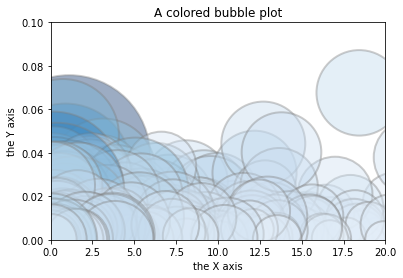

In [198]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
 
# create data
x = ct_info_df['EMPLOYMENT_DENSITY']
y = exposure_df['exposure1']
z = ct_info_df['POPULATION']
 
# Change color with c and alpha. I map the color to the X axis value.
plt.scatter(x,
            y,
            s=z,
            c=z,
            cmap="Blues",
            alpha=0.4,
            edgecolors="grey",
            linewidth=2)
 
# Add titles (main and on axis)
plt.xlabel("the X axis")
plt.ylabel("the Y axis")
plt.title("A colored bubble plot")
plt.xlim([0, 20])
plt.ylim([0, 0.1])
plt.show()


In [8]:
'''
# the function to calculate entropy of a vector
input: a vector
output: a number
'''
def S(vctor):
    log_vctor = np.log(vctor)
#     log_vctor[np.isinf(log_vctor)] = -10
    s = -np.sum(log_vctor * vctor)
#     if np.isnan(s) == True:
#         s = 10**-10
    return s

In [9]:
# s_i = []
# for j in range(3123):
#     s_i.append(S(v_matrix[j]))


In [10]:
'''
# the function to calculate entropy of a vector
input: the index i and j, 
       which refers to the i_th row and j_column of the v_matrix(exposure matrix)
output: a number
'''
def Delta(i, j):
    return S((v_matrix[i]+v_matrix[j])/2) - (S(v_matrix[i]) + S(v_matrix[j]))/2 

In [11]:
# initilize the Delta_matrix with 0s
rows = v_matrix.shape[0]
cols = v_matrix.shape[1]
Delta_matrix = np.zeros([rows,cols])

# calculate each element using the Delta funciton
for i in range(rows):
    for j in range(cols):
        Delta_matrix[i][j] = Delta(i, j)

In [13]:
Delta_matrix_df = pd.DataFrame(Delta_matrix, index = risk_flow_df.index, columns = risk_flow_df.index)

array([[0.        , 0.13984368, 0.69220625, ..., 0.69244005, 0.6911171 ,
        0.69154686],
       [0.13984368, 0.        , 0.69230193, ..., 0.6925066 , 0.69136601,
        0.69173313],
       [0.69220625, 0.69230193, 0.        , ..., 0.69261773, 0.69173967,
        0.69202399],
       ...,
       [0.69244005, 0.6925066 , 0.69261773, ..., 0.        , 0.2328544 ,
        0.37055073],
       [0.6911171 , 0.69136601, 0.69173967, ..., 0.2328544 , 0.        ,
        0.41910922],
       [0.69154686, 0.69173313, 0.69202399, ..., 0.37055073, 0.41910922,
        0.        ]])

## Agglomerative Clustering (linkage complete) 

The agglomerative clustering is the most common type of hierarchical clustering used to group objects in clusters based on their similarity.

In [99]:
Delta_matrix_df = pd.read_csv('Delta_matrix_df.csv').set_index("GEOID")
Delta_matrix_df

,17091011700,17091011800,17119400951,17119400952,17135957500,17119401100,17119401500,17119401722,17189950200,17189950400,...,17037000900,17037001600,17037000500,17037001700,17037001900,17037000100,17037001500,17037000400,17037000300,17037000200
GEOID,,,,,,,,,,,,,,,,,,,,,
17091011700,0.000000,0.139844,0.692206,0.691825,0.690161,0.691724,0.691165,0.691549,0.690963,0.690987,...,0.692467,0.691804,0.692172,0.691332,0.690402,0.692086,0.691853,0.692440,0.691117,0.691547
17091011800,0.139844,0.000000,0.692302,0.691972,0.690539,0.691885,0.691407,0.691735,0.691234,0.691254,...,0.692531,0.691954,0.692272,0.691550,0.690750,0.692198,0.691994,0.692507,0.691366,0.691733
17119400951,0.692206,0.692302,0.000000,0.178288,0.691059,0.504067,0.558899,0.515605,0.684893,0.691649,...,0.692638,0.692192,0.692437,0.691883,0.691238,0.692380,0.692220,0.692618,0.691740,0.692024
17119400952,0.691825,0.691972,0.178288,0.000000,0.690059,0.423469,0.492481,0.445828,0.676015,0.690954,...,0.692470,0.691801,0.692173,0.691316,0.690325,0.692087,0.691849,0.692442,0.691092,0.691538
17135957500,0.690161,0.690539,0.691059,0.690059,0.000000,0.689807,0.688091,0.689289,0.687395,0.687513,...,0.691666,0.690057,0.690943,0.688648,0.685307,0.690758,0.690274,0.691631,0.687925,0.689309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17037000100,0.692086,0.692198,0.692380,0.692087,0.690758,0.692009,0.691579,0.691876,0.691420,0.691437,...,0.466017,0.401348,0.383423,0.606667,0.690963,0.000000,0.430179,0.379990,0.487488,0.238669
17037001500,0.691853,0.691994,0.692220,0.691849,0.690274,0.691751,0.691215,0.691583,0.691023,0.691046,...,0.097039,0.150868,0.145034,0.497120,0.690497,0.430179,0.000000,0.175895,0.239306,0.392292
17037000400,0.692440,0.692507,0.692618,0.692442,0.691631,0.692395,0.692139,0.692316,0.692044,0.692053,...,0.173206,0.216603,0.091285,0.526524,0.691761,0.379990,0.175895,0.000000,0.232854,0.370551


In [90]:
AC = AgglomerativeClustering(
    distance_threshold=0, # setting distance_threshold=0 ensures we compute the full tree.
    n_clusters=None,
    linkage='complete')

AC_model = AC.fit(Delta_matrix_df)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_agglomerative.py:492: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


In [91]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

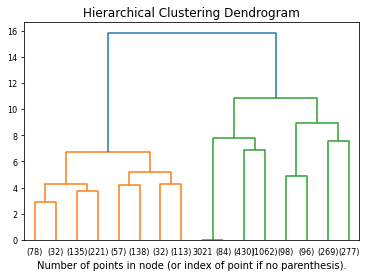

In [98]:
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(AC_model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.tick_params(labelsize=8)
plt.show()